In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
import math

In [2]:
# Data Preprocessing
train_data = pd.read_csv('digits_training_data.csv', header=None).to_numpy()
train_labels = pd.read_csv('digits_training_labels.csv', header=None).to_numpy()
test_data = pd.read_csv('digits_test_data.csv', header=None).to_numpy()
test_labels = pd.read_csv('digits_test_labels.csv', header=None).to_numpy()

train_labels[train_labels == 4] = -1
train_labels[train_labels == 9] = 1
test_labels[test_labels == 4] = -1
test_labels[test_labels == 9] = 1

num_samples, num_features = train_data.shape

In [3]:
# SVM Batch/Stochastic
C = 3
eta = .001
numIteration = 600

accuracy_batch = []
accuracy_stochastic = []

num_samples, num_features = train_data.shape
w_batch = np.zeros(num_features)
b_batch = 0

w_stochastic = np.zeros(num_features)
b_stochastic = 0

for j in range(1, numIteration + 1):
    w_grad_batch = w_batch
    b_grad_batch = 0
    summation_1_batch, summation_2_batch = 0, 0
    
    
    w_grad_stochastic = w_stochastic
    b_grad_stochastic = 0
    summation_1_stochastic, summation_2_stochastic = 0, 0
    
    learning_rate = eta / (1 + j * eta) 
    
    random_permutations = np.random.permutation(num_samples)
    
    for k in range(len(random_permutations)):
        indicator_stochastic = 0
        if train_labels[random_permutations[k]][0] * (np.transpose(w_stochastic).dot(train_data[random_permutations[k]]) + b_stochastic) < 1:
            indicator_stochastic = 1
        summation_1_stochastic -= train_labels[random_permutations[k]][0] * train_data[random_permutations[k]] * indicator_stochastic
        summation_2_stochastic += train_labels[random_permutations[k]][0] * indicator_stochastic
        w_grad_stochastic = w_grad_stochastic/numIteration + C * summation_1_stochastic
        b_grad_stochastic = b_grad_stochastic + C * summation_2_stochastic
        w_stochastic -= learning_rate*w_grad_stochastic
        b_stochastic -= learning_rate*b_grad_stochastic
        
        
    
    for i in range(num_samples):
        indicator_batch = 0
        if train_labels[i][0] * (np.transpose(w_batch).dot(train_data[i]) + b_batch) < 1:
            indicator_batch = 1
        summation_1_batch += -train_labels[i][0] * train_data[i] * indicator_batch
        summation_2_batch += -train_labels[i][0] * indicator_batch
        
    
    w_grad_batch -= C * summation_1_batch
    b_grad_batch -= C * summation_2_batch
    
    w_batch -= learning_rate*w_grad_batch
    b_batch -= learning_rate*b_grad_batch
    
    acc_batch = np.sign(train_data.dot(w_batch) + b_batch)
    acc_batch = np.mean(acc_batch == train_labels.ravel())
    accuracy_batch.append(acc_batch)
    
    acc_stochastic = np.sign(train_data.dot(w_stochastic) + b_stochastic)
    acc_stochastic = np.mean(acc_stochastic == train_labels.ravel())
    accuracy_stochastic.append(acc_stochastic)

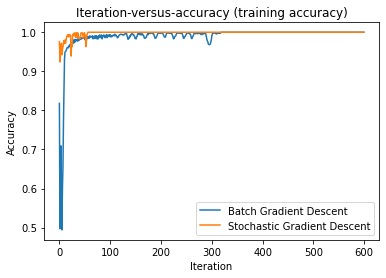

In [18]:
#SVM Batch/Stochastic Plot
plt.plot(np.arange(numIteration), accuracy_batch, label = "Batch Gradient Descent")
plt.plot(np.arange(numIteration), accuracy_stochastic, label = "Stochastic Gradient Descent")
plt.title("Iteration-versus-accuracy (training accuracy)")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

Training Accuracy: 1.0
Test Accuracy: 0.98


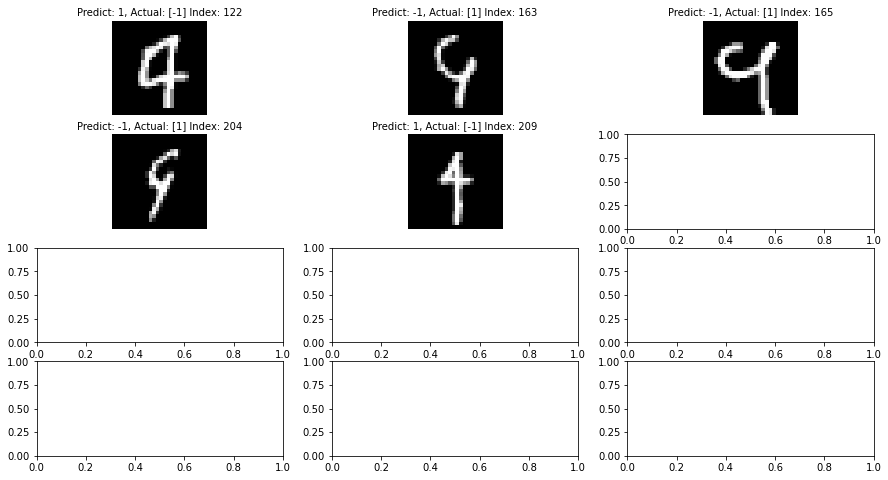

In [56]:
#Soft-Margin SVM with RBF Kernel + Accuracies and Misclassifications
clf = SVC(kernel='rbf', C=5)
clf.fit(train_data, train_labels.ravel())

print(f"Training Accuracy: {np.mean(clf.predict(train_data) == train_labels.ravel())}")

predictions = clf.predict(test_data)
predict_accuracy = (predictions == test_labels.ravel())
i, = np.where(predict_accuracy == False)

print(f"Test Accuracy: {np.mean(predict_accuracy)}")

misclassified = i

fig, ax = plt.subplots(4, 3,figsize=(15,8))
ax = ax.ravel()

for i, j in enumerate(misclassified):
    ax[i].imshow(np.reshape(test_data[j], (26, 26)), cmap=plt.cm.gray)
    ax[i].set_title(f'Predict: {predictions[j]}, '
                    f'Actual: {test_labels[j]} ' f'Index: {j}', fontsize = 10)
    ax[i].set(frame_on=False)
    ax[i].axis('off')
    if (i == 4):
        break

In [78]:
#LDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math

train_data = pd.read_csv('digits_training_data.csv', header=None).to_numpy()
train_labels = pd.read_csv('digits_training_labels.csv', header=None).to_numpy()
test_data = pd.read_csv('digits_test_data.csv', header=None).to_numpy()
test_labels = pd.read_csv('digits_test_labels.csv', header=None).to_numpy()

num_samples, num_features = train_data.shape

tot4 = np.count_nonzero(train_labels == 4)
mu_4, mu_9 = np.zeros(num_features), np.zeros(num_features)
        
for i in range(len(train_labels)):
    if(train_labels[i][0] == 4):
        mu_4 += train_data[i]
        train_labels[i][0] = -1
    else:
        mu_9 += train_data[i]
        train_labels[i][0] = 1
        
lam = tot4/len(train_labels)
mu_4 /= tot4
mu_9 /= (len(train_labels) - tot4)

test_labels[test_labels == 4] = -1
test_labels[test_labels == 9] = 1
        
cov = np.zeros((num_features, num_features))
for i in range(len(train_labels)):
    if(train_labels[i][0] == -1):
        diff = train_data[i] - mu_4
        diff = diff.reshape(num_features, 1)
        transDiff = diff.reshape(1, num_features)
        cov += np.matmul(diff, transDiff)
    else:
        diff = train_data[i] - mu_9
        diff = diff.reshape(num_features, 1)
        transDiff = diff.reshape(1, num_features)
        cov += np.matmul(diff, transDiff)

cov /= np.array(len(train_labels))

w = np.transpose(np.matmul(np.linalg.pinv(cov), (mu_9 - mu_4)))
b = .5 * np.matmul(np.matmul(np.transpose(mu_4), np.linalg.pinv(cov)), mu_4) - .5 * np.matmul(np.matmul(np.transpose(mu_9), np.linalg.pinv(cov)), mu_9) + math.log((lam/(1-lam)), math.e)

Training Accuracy: 
0.998
Test Accuracy: 
0.9


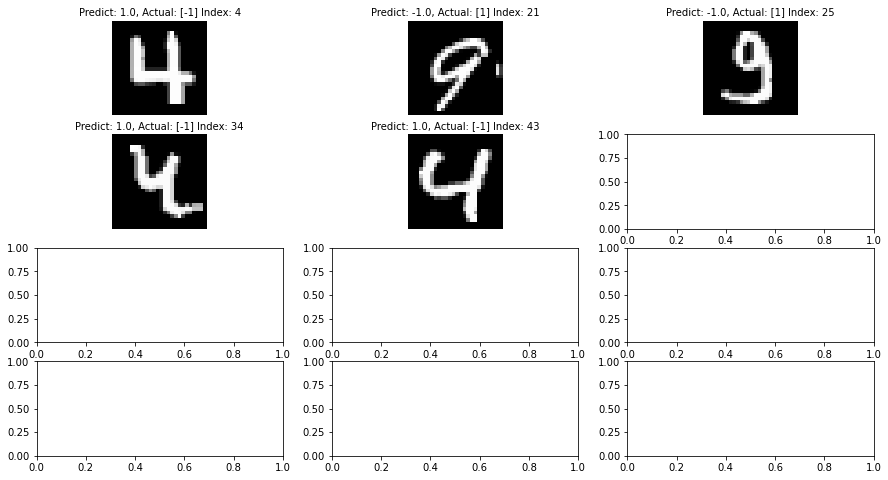

In [79]:
#LDA Accuracies and Misclassifications

predict_training = np.zeros(len(train_labels))
for i in range(len(train_labels)):
    prob = 1/(1+math.exp(-1 * (np.matmul(w, train_data[i]) + b)))
    if (prob < .5):
        predict_training[i] = -1
    else:
        predict_training[i] = 1

print("Training Accuracy: ")
print(np.mean(predict_training == train_labels.ravel()))

predict_test = np.zeros(len(test_labels))
for i in range(len(test_labels)):
    try:
        prob = 1/(1+math.exp(-1 * (np.matmul(w, test_data[i]) + b)))
        if (prob < .5):
            predict_test[i] = -1
        else:
            predict_test[i] = 1
    except:
        predict_test[i] = -1
    
    
predict_accuracy = (predict_test == test_labels.ravel())

print("Test Accuracy: ")
print(np.mean(predict_accuracy))

i, = np.where(predict_accuracy == False)

misclassified = i

fig, ax = plt.subplots(4, 3,figsize=(15,8))
ax = ax.ravel()

for i, j in enumerate(misclassified):
    ax[i].imshow(np.reshape(test_data[j], (26, 26)), cmap=plt.cm.gray)
    ax[i].set_title(f'Predict: {predict_test[j]}, '
                    f'Actual: {test_labels[j]} ' f'Index: {j}', fontsize = 10)
    ax[i].set(frame_on=False)
    ax[i].axis('off')
    if (i == 4):
        break